# Gradient Descent
An optimization problem trying to find a local minimum for a **differentiable** function capable of solving a wide range of problems. Here are the steps of this algorithm:
1. Start at some point x of the function (generally chosen randomly).
2. Repeat these until you find the minimum (gradient is 0):
    1. Calculate the local gradient at x.
    2. $x = x - \alpha * gradient$.

Fastest decrease/increase if we go in the opposite/same direction of the $\alpha * gradient$ to find the minimum/maximum.

#### $\alpha$ hyperparameter
As seen above, the amount of movement in the direction depends on the $\alpha$ hyperparameter, which should be tuned.

**Challenges:**
1. Small/Large $\alpha$.
2. Non-convex functions.
3. Feature scaling.
4. Dataset size (BGD).

Let's look at an example (fitting a 2d line):

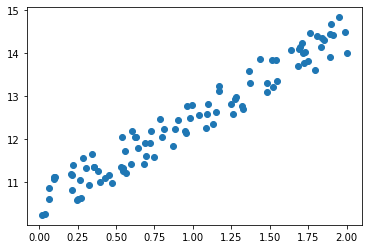

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Generating a random dataset (a = 2, b = 10)
X = 2 * np.random.rand(100, 1)
Y = 2 * X + 10 + np.random.rand(100, 1)

plt.scatter(X, Y)
plt.show()

Now each time we want to see how much a chosen line is off the marks, we use the MSE function:
$$
\frac{1}{n} (\theta^T X - Y)^2
$$

So our cost function is the MSE function with its gradient shown below:
$$
\frac{2}{n} X^T (X \theta - Y)
$$

In [22]:
alpha = 0.1
num_iter = 1000
n = 100
theta = np.random.randn(2, 1)  # random init (a, b)
print("Init values for a and b:", theta[0], theta[1])
Xp = np.c_[X, np.ones((100, 1))]  # adding 1 to each instance for the bias

times = [i for i in range(1, num_iter + 1)]
a_history = []
b_history = []

for _ in range(num_iter):
    a_history.append(theta[0])
    b_history.append(theta[1])
    grad = (2/n) * Xp.T.dot(Xp.dot(theta) - Y)
    theta = theta - alpha * grad

Init values for a and b: [-0.02655199] [-1.47420317]


In [23]:
print("Final values for a and b (true values are 2 and 10):", theta[0], theta[1])

Final values for a and b (true values are 2 and 10): [2.0155159] [10.4820967]


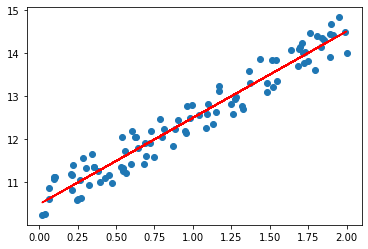

In [24]:
plt.scatter(X, Y)
plt.plot(X, theta[0] * X + theta[1], color="red")
plt.show()

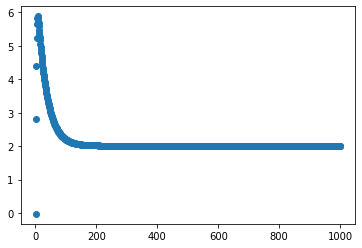

In [25]:
plt.scatter(times, a_history)
plt.show()

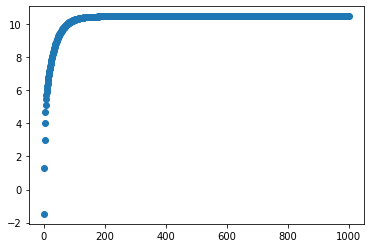

In [26]:
plt.scatter(times, b_history)
plt.show()

## Stochastic GD
Solving the 4th challenge (very slow on the whole dataset). Instead of the entire dataset at each step, only pick one instance! Much faster but much less regular than BGD. Unlike the BGD's gentle move towards the minimum, SGD bounces up and down, decreasing on average, and will never settle down (even around the minimum). The final values are good, but not the best!

SGD also solves the 2nd challenge; Therefore, it has a better chance of finding the global minimum.

One solution to the never-settling-down problem is to gradually decrease the learning rate (alpha) using a **learning schedule**, which determines each iteration's learning rate.

# HOMEWORK
Implement the SGD for the previous task.